In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv('train_airlines.csv')

In [22]:
px.box(df, y='Food and drink', color='Gender')

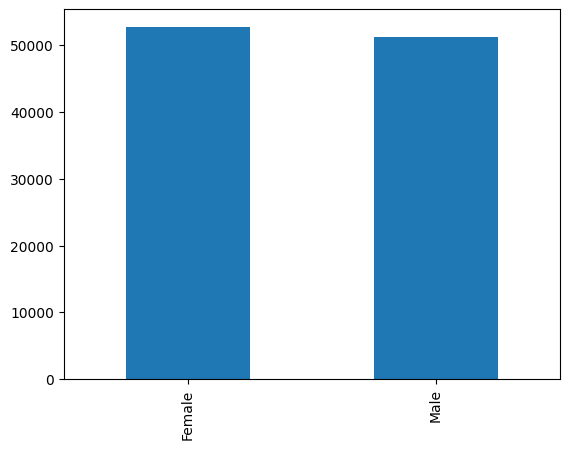

In [25]:
df['Gender'].value_counts().plot(kind='bar')
plt.show()

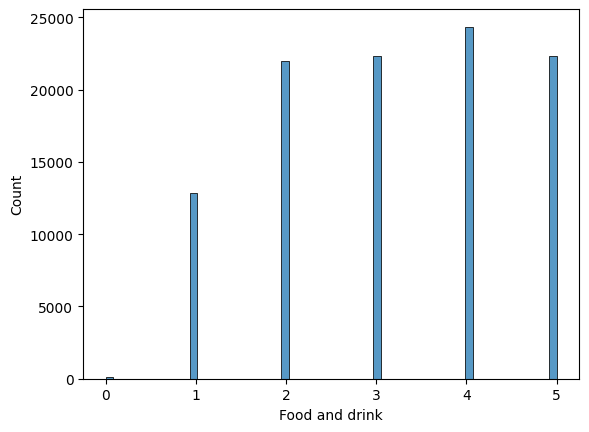

-0.1512794969916901

In [4]:
sns.histplot(df, x='Food and drink')
plt.show()

df['Food and drink'].skew()

Test de normalidad en la distribución: test de Kolmogorov-Smirnov o el test de Shapiro-Wilk

In [15]:
x = df['Food and drink']

In [16]:
from scipy import stats
if stats.kstest(x, stats.norm.cdf)[0] < 0.05: print('Reject H0: No Normal Distribution')
else: print('No rejection of H0: Distribution is Normal')

No rejection of H0: Distribution is Normal


In [17]:
from scipy import stats
if stats.shapiro(x)[0] < 0.05: print('Reject H0: No Normal Distribution')
else: print('No rejection of H0: Distribution is Normal')

No rejection of H0: Distribution is Normal


c:\Users\richi\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
